Install Pycaret

In [ ]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Get the version of the pycaret

In [ ]:
from pycaret.utils import version
version()

 Get the list of datasets available in pycaret

In [ ]:
from pycaret.datasets import get_data
dataSets = get_data('index')

Get the "pokemon" dataset

In [ ]:
pokemonDataSet = get_data("pokemon")    # SN is 30
# This is unsupervised dataset.
# No target is defined.

now get kMeans result without data pre-processing

In [ ]:
from pycaret.datasets import get_data
from pycaret.clustering import *

pokemonDataSet = get_data('pokemon', verbose=False)
setup(data = pokemonDataSet, verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

Clustering: Apply "Data Preprocessing"

In [ ]:
from pycaret.clustering import *
from pycaret.datasets import get_data

pokemonDataSet = get_data('pokemon')

Model Performance using "Normalization"

In [ ]:
setup(data = pokemonDataSet, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)


Model Performance using "Transformation"

In [ ]:
setup(data = pokemonDataSet, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

Model Performance using "PCA"

In [ ]:
setup(data = pokemonDataSet, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

Model Performance using "Transformation" + "Normalization"

In [ ]:
setup(data = pokemonDataSet, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

Model Performance using "Transformation" + "Normalization" + "PCA"

In [ ]:
setup(data = pokemonDataSet, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore',
      transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

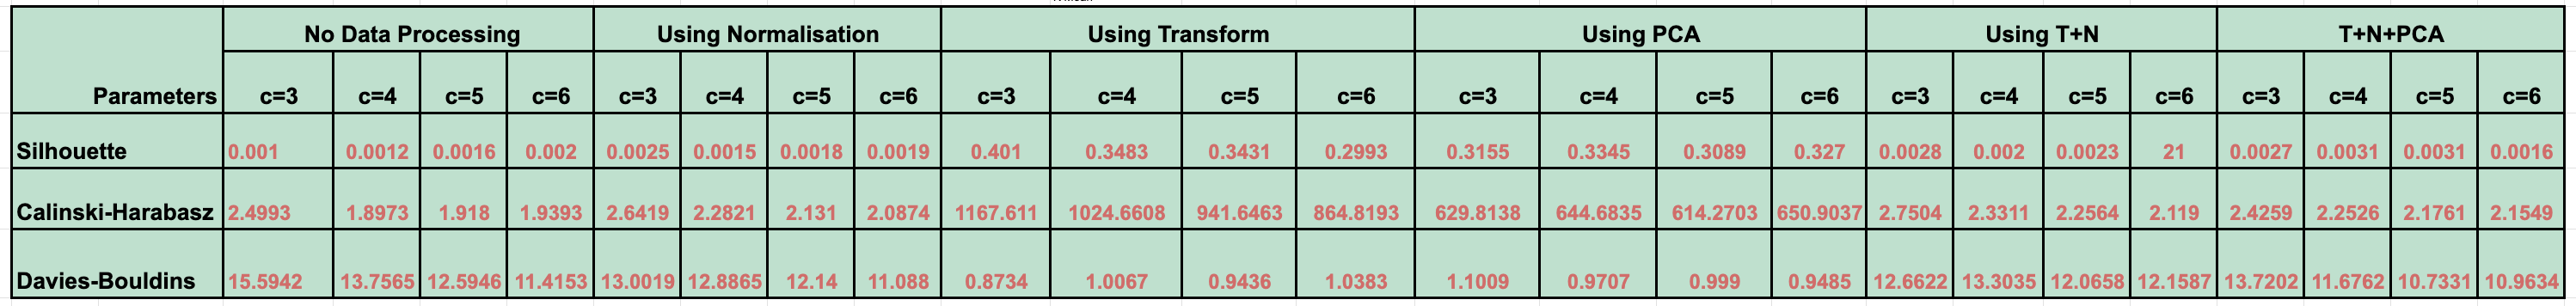

Evaluation

In [ ]:
# Import necessary libraries
from pycaret.datasets import get_data
from pycaret.clustering import *
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

# Load the Pokémon dataset
pokemonDataSet = get_data('pokemon', verbose=False)

# Convert categorical columns to numeric using one-hot encoding
pokemonDataSet_encoded = pd.get_dummies(pokemonDataSet, drop_first=True)

# Initialize PyCaret clustering setup with encoded data
setup(data=pokemonDataSet_encoded, verbose=False)

# Define the number of clusters for analysis
cluster_range = [3, 4, 5, 6]

# Function to plot the elbow, silhouette, and 2D PCA for a given clustering model
def clustering_analysis(model_name='kmeans', cluster_range=[3, 4, 5, 6]):
    results = {}
    for c in cluster_range:
        print(f"\nClustering with {model_name} and Cluster = {c}")
        model = create_model(model_name, num_clusters=c)

        # Store model in dictionary
        results[c] = model

        # Generate Elbow Plot
        print("\nElbow Plot:")
        plot_model(model, plot='elbow')

        # Generate Silhouette Plot
        print("\nSilhouette Plot:")
        plot_model(model, plot='silhouette')

        # Generate 2D PCA Plot
        print("\n2D PCA Plot:")
        plot_model(model, plot='cluster')

    return results

# Run clustering analysis for k-means with specified cluster numbers
results_dict = clustering_analysis(model_name='kmeans', cluster_range=cluster_range)

# Generate 3D t-SNE Plot for the best model
def plot_tsne_3d(data, model, title="3D t-SNE Plot"):
    # Apply t-SNE with 3 components
    tsne = TSNE(n_components=3, random_state=42)
    tsne_data = tsne.fit_transform(data)

    # Predict clusters using the model
    labels = model.predict(data)  # Predict clusters

    # Create a DataFrame for visualization
    tsne_df = pd.DataFrame(tsne_data, columns=['TSNE1', 'TSNE2', 'TSNE3'])
    tsne_df['Cluster'] = labels  # Assign predicted cluster labels

    # Plotting the 3D t-SNE
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], tsne_df['TSNE3'],
                         c=tsne_df['Cluster'], cmap='viridis', s=50)
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    ax.set_title(title)
    plt.show()

# Example: Using t-SNE plot for k-means with a chosen number of clusters (e.g., 4)
best_model_data = get_config('X')  # Retrieves the processed data used by PyCaret
best_model = results_dict[4]  # Choose the model with 4 clusters, or change as needed
plot_tsne_3d(best_model_data, best_model, "3D t-SNE Plot for k-means with c=4 Clusters")
